In [4]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from ogs6py.ogs import OGS
import vtuIO

In [5]:
pvdfile_th2m = vtuIO.PVDIO("model_run_10/TH2M_run_10.pvd", dim=2)
time_th2m = pvdfile_th2m.timesteps

In [6]:
pvdfile_trm = vtuIO.PVDIO("../1d-axi_trm/model_run_10/TRM_run_10_noeq_latentheat_master.pvd", dim=2)
time_trm = pvdfile_trm.timesteps

In [7]:
pts = {
#"H1": (0.1575,0,0),
#"H2": (0.42,0,0),
"GBM1": (0.590625,0,0),
"GBM2": (0.9625,0,0),
"GBM3": (1.35625,0,0),
"SC1": (1.43,0,0),
"SC2": (1.5,0,0),
"SC3": (1.58,0,0),
"EDZ1": (1.63,0,0),
"EDZ2": (1.7,0,0),
"EDZ3": (1.78,0,0),
"OPA1": (1.83,0,0),
"OPA2": (2,0,0),
"OPA3": (5,0,0),
"OPA4": (20,0,0),
"OPA5": (30,0,0),
"OPA6": (40,0,0),
"OPA7": (50,0,0)
}

In [8]:
result_variables_th2m = ["temperature","gas_pressure","capillary_pressure",
                    "saturation"]
result_variables_trm = ["temperature","pressure","saturation"]

In [9]:
results_th2m = pvdfile_th2m.read_time_series(result_variables_th2m, pts=pts)
results_trm = pvdfile_trm.read_time_series(result_variables_trm, pts=pts)

In [10]:
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

def to_years(seconds):
    return seconds / 365.2425 / 86400

def plot_references(pt, var, log=False):
     
    if var=="temperature":
        th2m = results_th2m[pt]["temperature"]-273.15
        trm = results_trm[pt]["temperature"]-273.15
        y_label = "$T$ / $^\circ C$"
    if var=="saturation":
        th2m = results_th2m[pt]["saturation"]
        trm = results_trm[pt]["saturation"]
        y_label = "$s_\\mathrm{L}$ / 1"
    if var=="gas_pressure":
        th2m = results_th2m[pt]["gas_pressure"]/1e6
        trm = np.full(len(time_trm), 1.0e5)/1e6
        y_label = "$p_\\mathrm{GR}$ / MPa"
    if var=="liquid_pressure":
        th2m = (results_th2m[pt]["gas_pressure"]-results_th2m[pt]["capillary_pressure"])/1e6
        trm = results_trm[pt]["pressure"]/1e6
        y_label = "$p_\\mathrm{LR}$ / MPa"
    
    fig = plt.figure(figsize=(4, 3))
    ax = fig.gca()
    #ax.text(0.5, 370, "Some text",fontstyle="italic")
    # ax.set_xlim(5e3, 1e6)
    
    if log==True:
        ax.set_xscale("log")
        
    #ax.set_ylim(365, 375)

    #ax.xaxis.set_minor_locator(AutoMinorLocator())
    #ax.yaxis.set_minor_locator(AutoMinorLocator())
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.3f"))

    # Change the y axis label to Arial
    ax.set_xlabel("t / a", fontsize=10)
    ax.set_ylabel(y_label, fontsize=10)
    
    ax.plot(to_years(time_th2m), th2m, color='blue', linewidth=1, linestyle="-", label='TH$^2$M')
    ax.plot(to_years(time_trm), trm, color='red', linewidth=1, linestyle="-", label='TRM')

    ax.legend()
    ax.set_title(var+" at "+pt)
    plt.tight_layout()
    fig.savefig(var+'.pdf')

<ipython-input-10-219af00b186f>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4, 3))


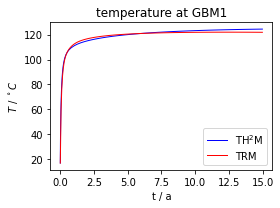

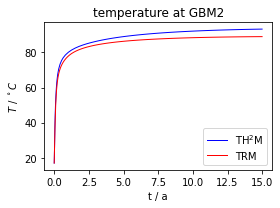

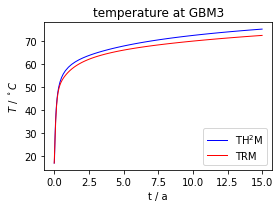

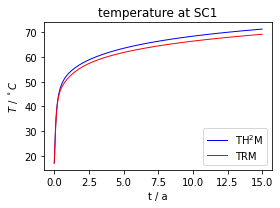

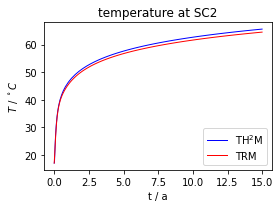

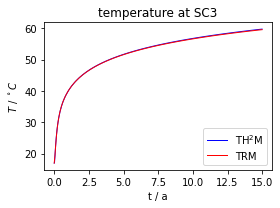

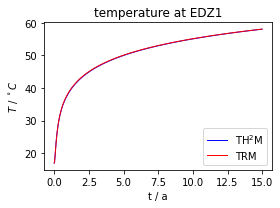

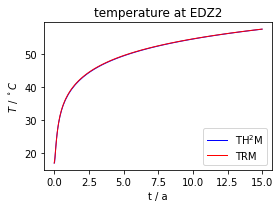

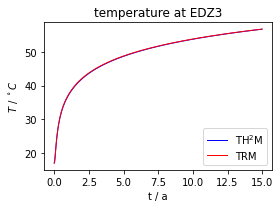

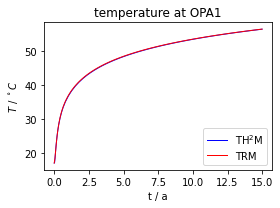

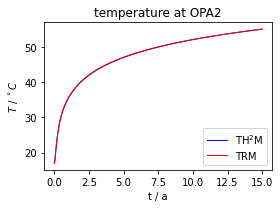

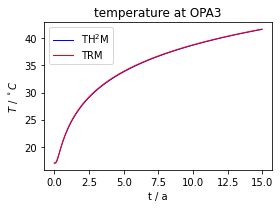

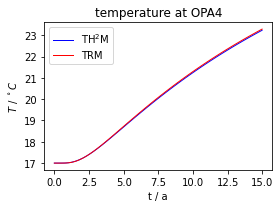

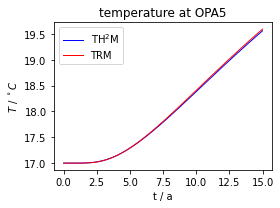

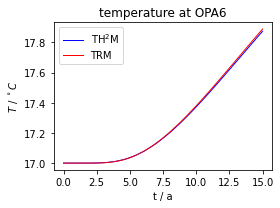

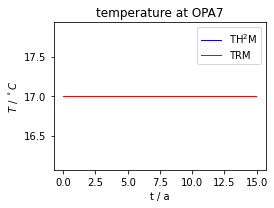

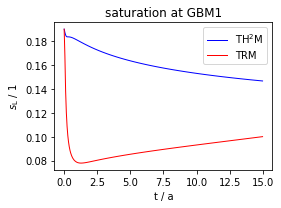

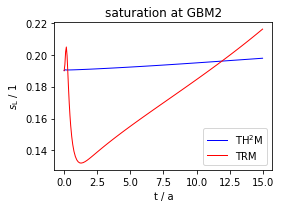

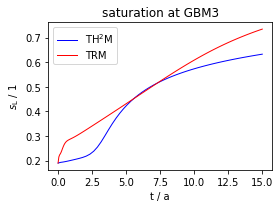

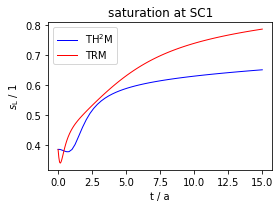

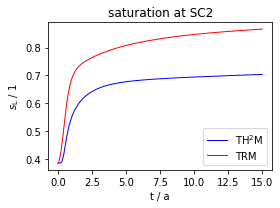

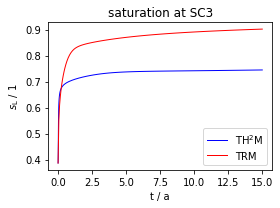

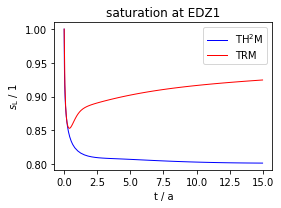

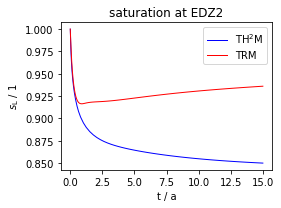

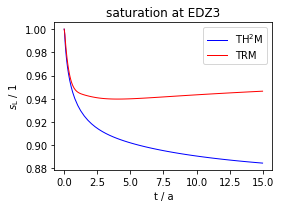

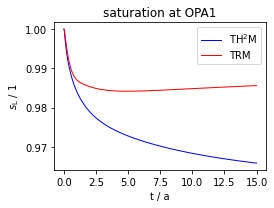

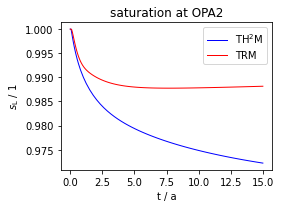

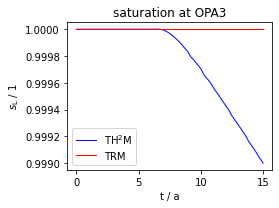

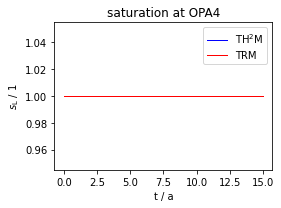

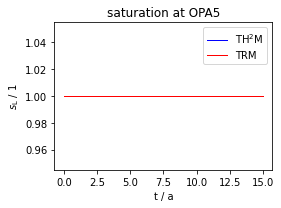

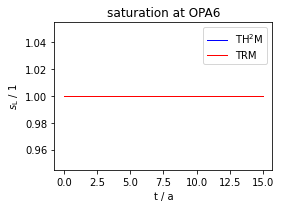

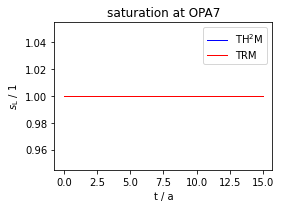

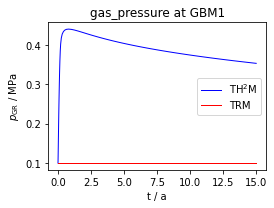

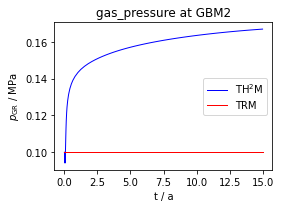

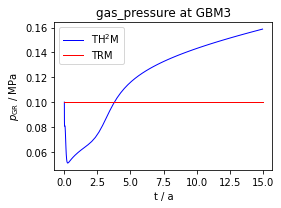

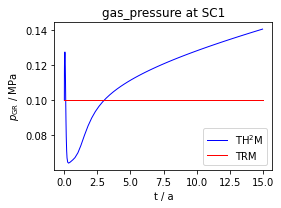

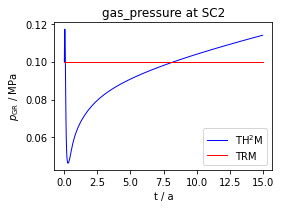

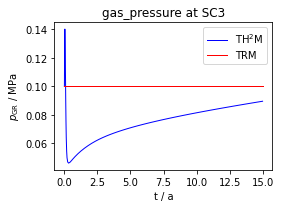

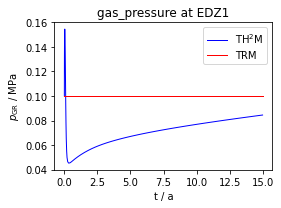

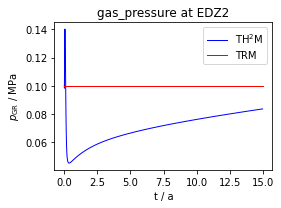

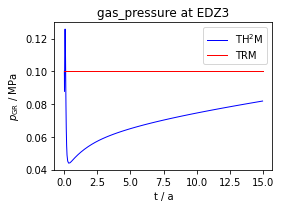

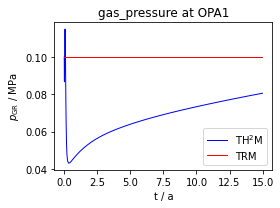

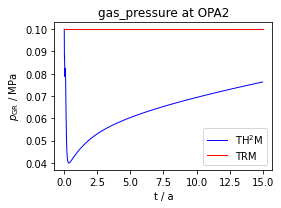

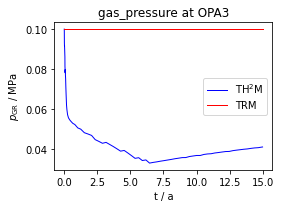

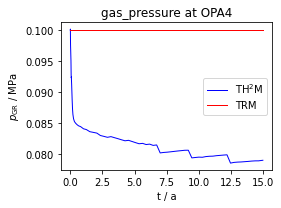

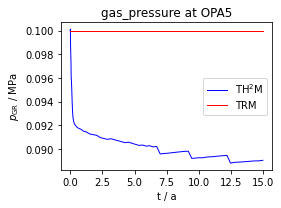

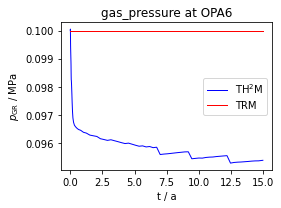

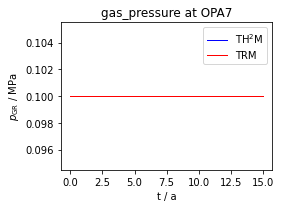

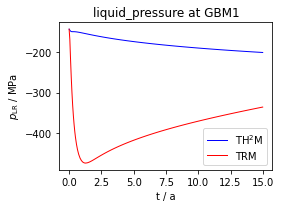

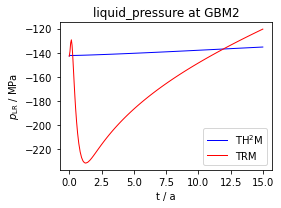

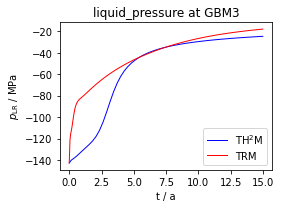

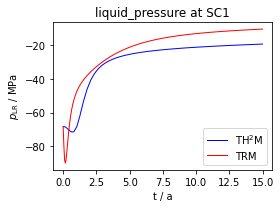

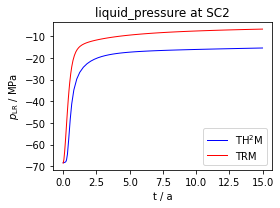

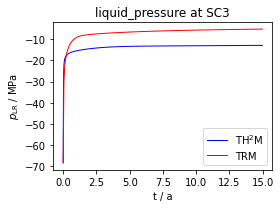

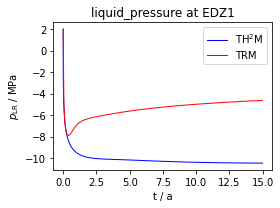

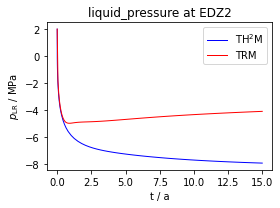

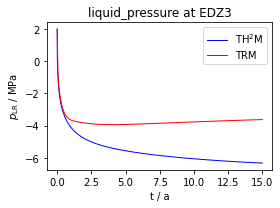

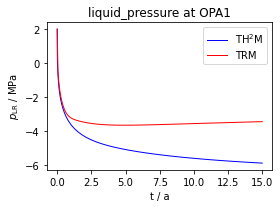

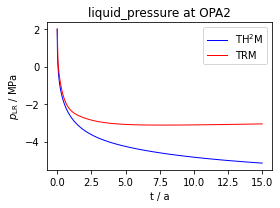

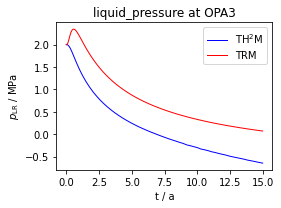

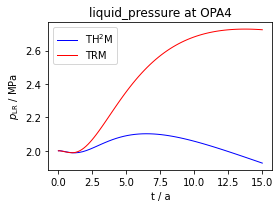

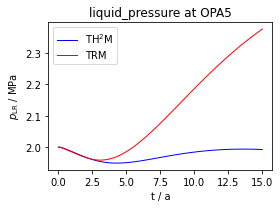

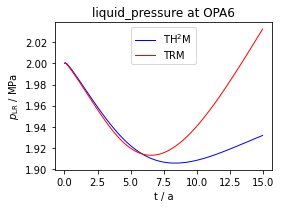

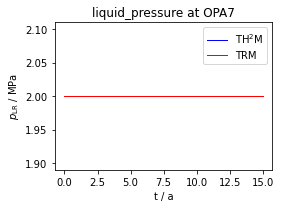

In [11]:
plots = ["temperature", "saturation", "gas_pressure", "liquid_pressure"]

for var in plots:
    for p in pts:
        plot_references(p,var)

In [12]:
def plot_four(pt, log=False):
     

    T_th2m = results_th2m[pt]["temperature"]-273.15
    T_trm = results_trm[pt]["temperature"]-273.15
    sL_th2m = results_th2m[pt]["saturation"]
    sL_trm = results_trm[pt]["saturation"]
    pGR_th2m = results_th2m[pt]["gas_pressure"]/1e6
    pGR_trm = np.full(len(time_trm), 1.0e5)/1e6
    pLR_th2m = (results_th2m[pt]["gas_pressure"]-results_th2m[pt]["capillary_pressure"])/1e6
    pLR_trm = results_trm[pt]["pressure"]/1e6
    
    
    
    
    
    
    
    th2m_color = 'blue'
    th2m_lw = 1
    th2m_ls = "-"
    trm_color = 'red'
    trm_lw = 1
    trm_ls = "-"
    
    
    fig = plt.figure(figsize=(4, 3))
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))
           
    if log==True:
        ax1.set_xscale("log")
        ax2.set_xscale("log")
        ax3.set_xscale("log")
        ax4.set_xscale("log")
        
    
    # Plot temperature
    ax1.plot(to_years(time_th2m), T_th2m, color=th2m_color, linewidth=th2m_lw, linestyle=th2m_ls, label='TH$^2$M')
    ax1.plot(to_years(time_trm), T_trm, color=trm_color, linewidth=trm_lw, linestyle=trm_ls, label='TRM')
    ax1.legend()
    ax1.set_title("Temperature at " + pt)
    ax1.set_xlabel("t / a", fontsize=10)
    ax1.set_ylabel("$T$ / $^\circ C$", fontsize=10)
 
    # Plot saturation
    ax2.plot(to_years(time_th2m), sL_th2m, color=th2m_color, linewidth=th2m_lw, linestyle=th2m_ls, label='TH$^2$M')
    ax2.plot(to_years(time_trm), sL_trm, color=trm_color, linewidth=trm_lw, linestyle=trm_ls, label='TRM')
    ax2.legend()
    ax2.set_title("Saturation at " + pt)
    ax2.set_xlabel("t / a", fontsize=10)
    ax2.set_ylabel("$s_\\mathrm{L}$ / 1", fontsize=10)
 
    # Plot gas pressure
    ax3.plot(to_years(time_th2m), pGR_th2m, color=th2m_color, linewidth=th2m_lw, linestyle=th2m_ls, label='TH$^2$M')
    ax3.plot(to_years(time_trm), pGR_trm, color=trm_color, linewidth=trm_lw, linestyle=trm_ls, label='TRM')
    ax3.legend()
    ax3.set_title("Gas pressure at " + pt)
    ax3.set_xlabel("t / a", fontsize=10)
    ax3.set_ylabel("$p_\\mathrm{GR}$ / MPa", fontsize=10)
 
    # Plot liqiuid pressure
    ax4.plot(to_years(time_th2m), pLR_th2m, color=th2m_color, linewidth=th2m_lw, linestyle=th2m_ls, label='TH$^2$M')
    ax4.plot(to_years(time_trm), pLR_trm, color=trm_color, linewidth=trm_lw, linestyle=trm_ls, label='TRM')
    ax4.legend()
    ax4.set_title("Liquid pressure at " + pt)
    ax4.set_xlabel("t / a", fontsize=10)
    ax4.set_ylabel("$p_\\mathrm{LR}$ / MPa", fontsize=10)
         
    plt.tight_layout()
    fig.savefig(pt+'.pdf')

<ipython-input-12-c590ff93850c>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4, 3))


<Figure size 288x216 with 0 Axes>

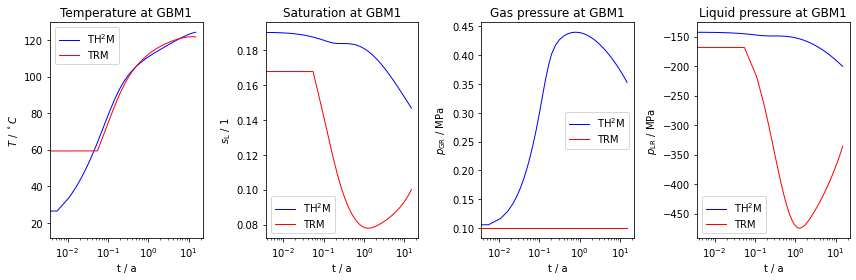

<Figure size 288x216 with 0 Axes>

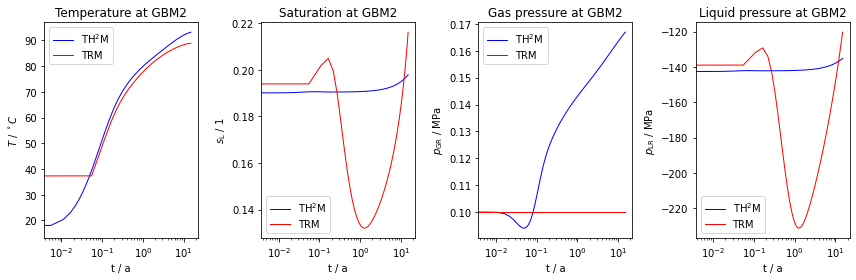

<Figure size 288x216 with 0 Axes>

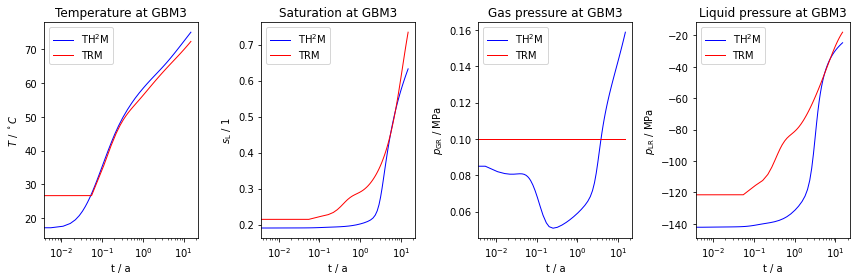

<Figure size 288x216 with 0 Axes>

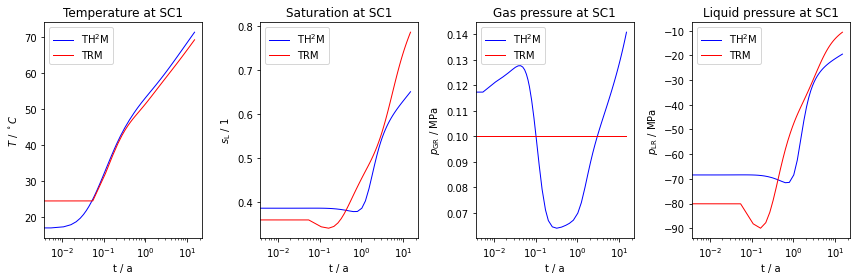

<Figure size 288x216 with 0 Axes>

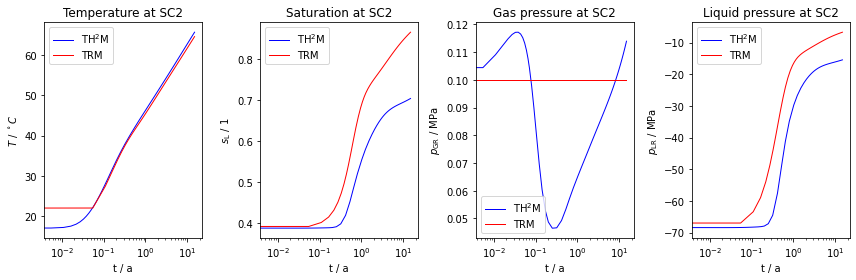

<Figure size 288x216 with 0 Axes>

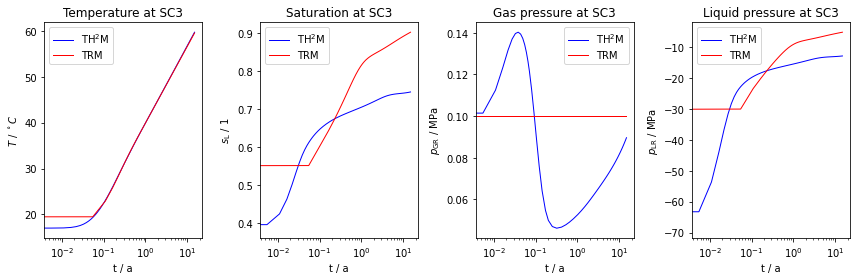

<Figure size 288x216 with 0 Axes>

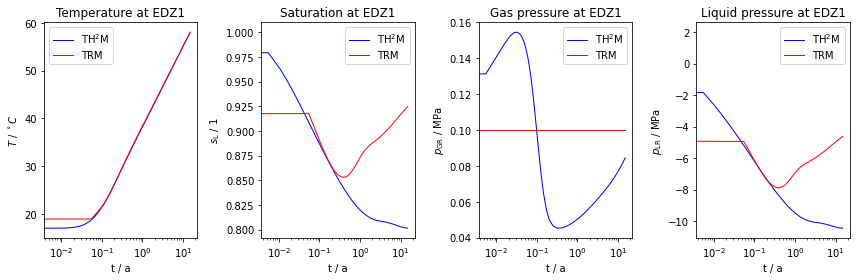

<Figure size 288x216 with 0 Axes>

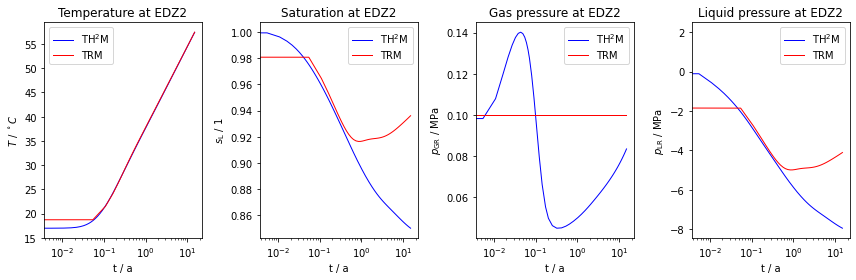

<Figure size 288x216 with 0 Axes>

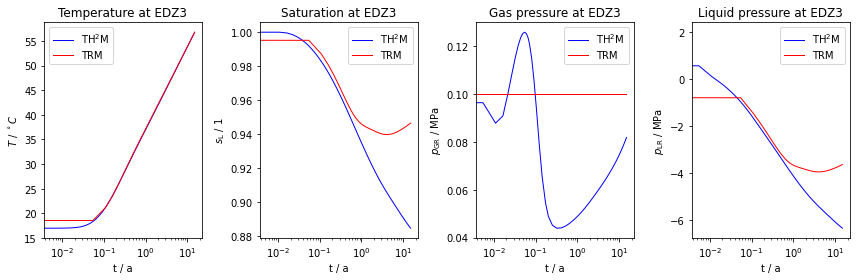

<Figure size 288x216 with 0 Axes>

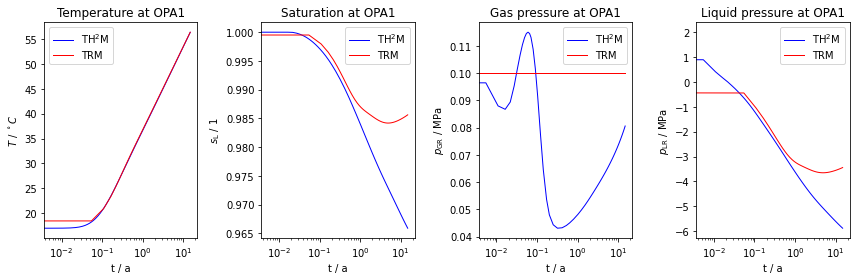

<Figure size 288x216 with 0 Axes>

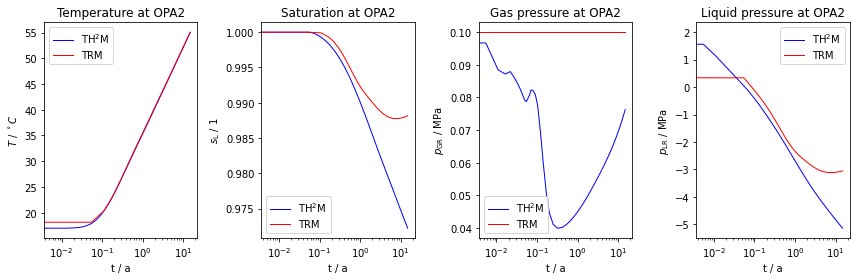

<Figure size 288x216 with 0 Axes>

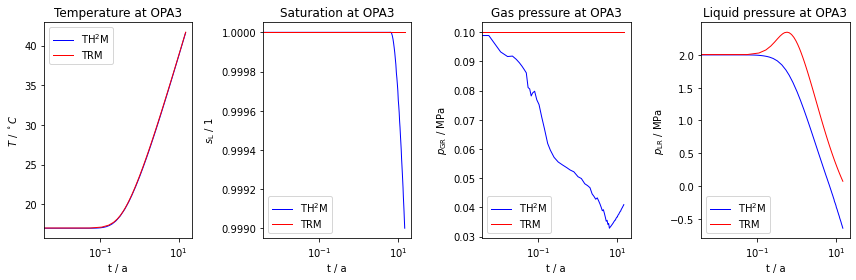

<Figure size 288x216 with 0 Axes>

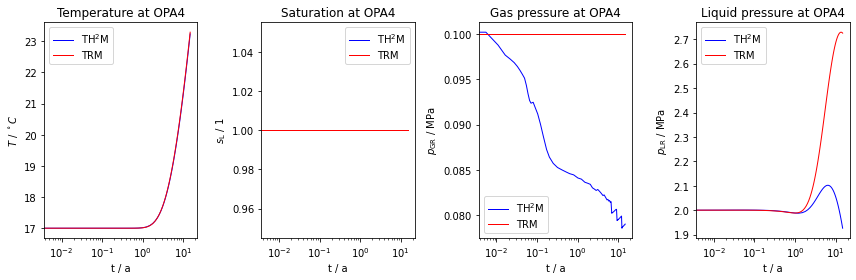

<Figure size 288x216 with 0 Axes>

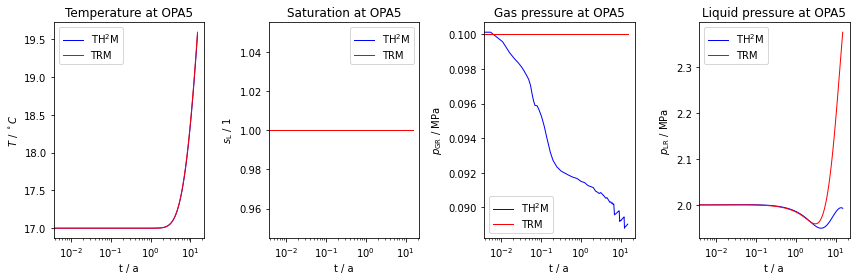

<Figure size 288x216 with 0 Axes>

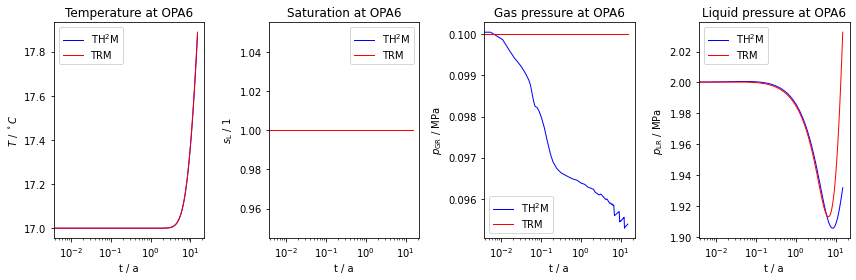

<Figure size 288x216 with 0 Axes>

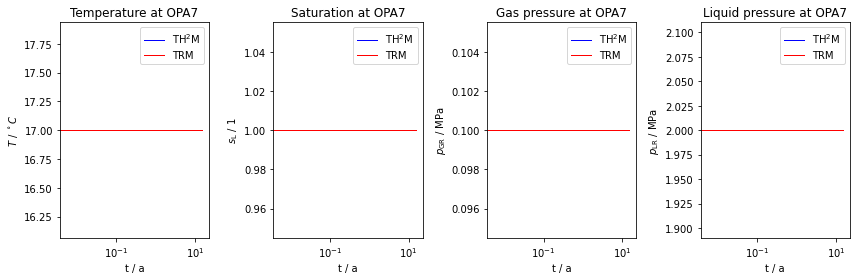

In [13]:
for p in pts:
    plot_four(p,True)